In [1]:
import json
import numpy as np
from sklearn.cluster import KMeans

# Load embeddings from the JSON files
embedding_files = ['embeddings/animals.json', 'embeddings/companies.json', 'embeddings/computer_components.json', 'embeddings/events.json',
                  'embeddings/landmarks.json','embeddings/movies.json','embeddings/people.json',
                  'embeddings/research_fields.json','embeddings/university.json','embeddings/vehicles.json']

all_embeddings = []
file_names = []  # To store the corresponding file names

# Iterate through each file and load its content
for file in embedding_files:
    with open(file, 'r') as f:
        data = json.load(f)  # Load the data from each file
        
        # Add embeddings and file names
        embeddings = np.array([item['embedding'] for item in data])  # Extract 'embedding' key
        all_embeddings.append(embeddings)  # Add the embeddings
        file_names.extend([item['file_name'] for item in data])  # Store file names

# Combine all embeddings into a single array
all_embeddings = np.concatenate(all_embeddings, axis=0)

# Check the shape of the combined embeddings
print("Combined embeddings shape:", all_embeddings.shape)


Combined embeddings shape: (200, 1536)


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)  # Reduce to 9 dimensions
reduced_embeddings = pca.fit_transform(all_embeddings)

kmeans40 = KMeans(n_clusters=40, init='k-means++', n_init=10, max_iter=1000, random_state=42)
labels40 = kmeans40.fit_predict(reduced_embeddings)

print(labels40)



[ 3  3  3  3  3 32 32 32 32 32 18 18 18 18 18 39 39 39 39 39 19 19 19 19
 19 36 36 36 36 36  9  9  9  9  9 37 37 37 37 37 38 38 38 38 38 33 33 33
 33 33  4  4  4  4  4 25 25 25 25 25 15 15 15 15 15 23 23 23 23 23 34 34
 34 34 34 10 10 10 10 10 11 11 11 11 11 20 20 20 20 20  8  8  8  8  8 24
 24 24 24 24 27 27 27 27 27 17 17 17 17 17 30 30 30 30 30  1  1  1  1  1
 12 12 12 12 12  5  5  5  5  5 21 21 21 21 21 13 13 13 13 13 14 14 14 14
 14  0  0  0  0  0 29 29 29 29 29 22 22 22 22 22 35 35 35 35 35  7  7  7
  7  7 16 16 16 16 16  2  2  2  2  2 28 28 28 28 28 31 31 31 31 31 26 26
 26 26 26  6  6  6  6  6]


In [3]:
# Now print the clusters with the corresponding filenames
for cluster_num in range(40):
    cluster_members = [file_names[idx] for idx in range(len(labels40)) if labels40[idx] == cluster_num]
    print(f"Cluster {cluster_num}: {cluster_members}")

Cluster 0: ['economics1.txt', 'economics2.txt', 'economics3.txt', 'economics4.txt', 'economics5.txt']
Cluster 1: ['star_wars1.txt', 'star_wars2.txt', 'star_wars3.txt', 'star_wars4.txt', 'star_wars5.txt']
Cluster 2: ['vse1.txt', 'vse2.txt', 'vse3.txt', 'vse4.txt', 'vse5.txt']
Cluster 3: ['cat1.txt', 'cat2.txt', 'cat3.txt', 'cat4.txt', 'cat5.txt']
Cluster 4: ['motherboard1.txt', 'motherboard2.txt', 'motherboard3.txt', 'motherboard4.txt', 'motherboard5.txt']
Cluster 5: ['havel1.txt', 'havel2.txt', 'havel3.txt', 'havel4.txt', 'havel5.txt']
Cluster 6: ['train1.txt', 'train2.txt', 'train3.txt', 'train4.txt', 'train5.txt']
Cluster 7: ['mit1.txt', 'mit2.txt', 'mit3.txt', 'mit4.txt', 'mit5.txt']
Cluster 8: ['eiffel_tower1.txt', 'eiffel_tower2.txt', 'eiffel_tower3.txt', 'eiffel_tower4.txt', 'eiffel_tower5.txt']
Cluster 9: ['microsoft1.txt', 'microsoft2.txt', 'microsoft3.txt', 'microsoft4.txt', 'microsoft5.txt']
Cluster 10: ['world_war1.txt', 'world_war2.txt', 'world_war3.txt', 'world_war4.txt', 

In [4]:
import os, re
def extract_entity(fn):
    base = os.path.splitext(fn)[0]
    base = base.replace('gold_', '').replace('_gold', '')
    return re.sub(r'\d+$', '', base)

true_entities = [extract_entity(fn) for fn in file_names]

# H1: define "domain" groups
expected_groups = {
    0: ['havel','klaus','einstein','mandela'],
    1: ['chemistry','economics','mathematics','physics'],
    2: ['amazon','google','microsoft','tencent'],
    3: ['airplane','boat','car','train'],
    4: ['boston_tea','moon_landing','velvet_revolution','world_war'],
    5: ['buckingham_palace','charles_bridge','eiffel_tower','fuji'],
    6: ['cat','dolphin','elephant','giraffe'],
    7: ['cpu','gpu','motherboard','ram'],
    8: ['cuni','mit','oxford','vse'],
    9: ['lord_rings','matrix','pirates','star_wars']
}
entity_to_group = {ent: grp for grp, ents in expected_groups.items() for ent in ents}

#H2: one cluster per entity
unique_entities = sorted(set(true_entities))
entity_to_idx    = {ent: idx for idx, ent in enumerate(unique_entities)}

# Build ground-truth labels
groundtruth10 = [entity_to_group[ent]   for ent in true_entities]
groundtruth40 = [entity_to_idx[ent]     for ent in true_entities]

invalid = [e for e in true_entities if e not in entity_to_group]
if invalid:
    raise ValueError(f"Unmapped in H1 groups: {set(invalid)}")

print(groundtruth10)
print(groundtruth40)


[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 1, 1, 1, 1, 1, 18, 18, 18, 18, 18, 26, 26, 26, 26, 26, 35, 35, 35, 35, 35, 9, 9, 9, 9, 9, 19, 19, 19, 19, 19, 29, 29, 29, 29, 29, 33, 33, 33, 33, 33, 3, 3, 3, 3, 3, 28, 28, 28, 28, 28, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 13, 13, 13, 13, 13, 16, 16, 16, 16, 16, 22, 22, 22, 22, 22, 25, 25, 

In [5]:
# Apply k-means clustering with 10 clusters
kmeans10 = KMeans(n_clusters=10, random_state=42)
labels10 = kmeans10.fit_predict(reduced_embeddings)

# Check the cluster assignments
print(labels10)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 4 4 4 4 4 4 4 4 4 4 0 0 0 0
 0 4 4 4 4 4 5 5 5 5 5 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 4 4 4 4 4 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [6]:
from sklearn.metrics import rand_score
rand_index = rand_score(groundtruth40, labels40)

print(f"Rand Index: {rand_index}")

Rand Index: 1.0


In [7]:
from sklearn.metrics import adjusted_rand_score

ari40 = adjusted_rand_score(groundtruth40, labels40)
print(f"Adjusted Rand Index: {ari40:.4f}")

Adjusted Rand Index: 1.0000


In [8]:
for cluster_num in range(10):
    cluster_members = [file_names[idx] for idx in range(len(labels10)) if labels10[idx] == cluster_num]
    print(f"Cluster {cluster_num}: {cluster_members}")

Cluster 0: ['velvet_revolution1.txt', 'velvet_revolution2.txt', 'velvet_revolution3.txt', 'velvet_revolution4.txt', 'velvet_revolution5.txt', 'havel1.txt', 'havel2.txt', 'havel3.txt', 'havel4.txt', 'havel5.txt', 'klaus1.txt', 'klaus2.txt', 'klaus3.txt', 'klaus4.txt', 'klaus5.txt']
Cluster 1: ['einstein1.txt', 'einstein2.txt', 'einstein3.txt', 'einstein4.txt', 'einstein5.txt', 'chemistry1.txt', 'chemistry2.txt', 'chemistry3.txt', 'chemistry4.txt', 'chemistry5.txt', 'economics1.txt', 'economics2.txt', 'economics3.txt', 'economics4.txt', 'economics5.txt', 'mathematics1.txt', 'mathematics2.txt', 'mathematics3.txt', 'mathematics4.txt', 'mathematics5.txt', 'physics1.txt', 'physics2.txt', 'physics3.txt', 'physics4.txt', 'physics5.txt']
Cluster 2: ['cat1.txt', 'cat2.txt', 'cat3.txt', 'cat4.txt', 'cat5.txt', 'dolphin1.txt', 'dolphin2.txt', 'dolphin3.txt', 'dolphin4.txt', 'dolphin5.txt', 'elephant1.txt', 'elephant2.txt', 'elephant3.txt', 'elephant4.txt', 'elephant5.txt', 'giraffe1.txt', 'giraffe

In [9]:
from sklearn.metrics import rand_score
rand_index = rand_score(groundtruth10, labels10)

print(f"Rand Index: {rand_index}")

Rand Index: 0.9623115577889447


In [10]:
from sklearn.metrics import adjusted_rand_score

ari10 = adjusted_rand_score(groundtruth10, labels10)
print(f"Adjusted Rand Index: {ari10:.4f}")

Adjusted Rand Index: 0.7843


In [11]:
# experiment - not used in thesis text
import re
import pandas as pd

true_entities = [
    re.match(r"(.+?)(?:\d+)\.txt$", fn).group(1)
    for fn in file_names
]
df = pd.DataFrame({
    'entity':    true_entities,
    'cluster10': labels10
})

# 2) Count unique entities per cluster:
entity_counts = df.groupby('cluster10')['entity'].nunique()
print("Unique entity counts per k=10 cluster:\n", entity_counts)

# 3) Check which clusters deviate from 5:
bad = entity_counts[entity_counts != 5]
if bad.empty:
    print("✅ Every cluster has exactly 5 entities.")
else:
    print("❌ These clusters don’t have 5 entities:")
    print(bad)

# 4) (Optional) If you want a quick “homogeneity” check 
#    *against* your *expected* 5‐entity groups, you must encode
#    those groups manually. For example:
expected_groups = {
    0: ['havel','klaus','einstein','mandela'],
    1: ['chemistry','economics','mathematics','physics'],
    2: ['amazon', 'google', 'microsoft', 'tencent'],
    3: ['airplane', 'boat','car','train'],
    4: ['boston_tea','moon_landing','velvet_revolution','world_war'],
    5: ['buckingham_palace', 'charles_bridge','eiffel_tower','fuji'],
    6: ['cat','dolphin', 'elephant','giraffe'],
    7: ['cpu','gpu','motherboard','ram'],
    8: ['cuni','mit','oxford','vse'],
    9: ['lord_rings','matrix','pirates','star_wars']
    
    # … fill in for clusters 2–9 …
}

# build a mapping entity→expected_group_id
entity_to_group = {
    e: grp for grp, ents in expected_groups.items() for e in ents
}

# map your true entities into these group‐ids:
true_group_labels = [entity_to_group[e] for e in true_entities]

from sklearn.metrics import homogeneity_score, completeness_score

h = homogeneity_score(true_group_labels, labels10)
c = completeness_score(true_group_labels, labels10)
ari_group  = adjusted_rand_score(true_group_labels, labels10)

print(f"Homogeneity (k=10): {h:.3f}")
print(f"Completeness (k=10): {c:.3f}")
print(f"ARI_pro_H1        = {ari_group:.3f}")


Unique entity counts per k=10 cluster:
 cluster10
0    3
1    5
2    4
3    4
4    5
5    3
6    4
7    4
8    4
9    4
Name: entity, dtype: int64
❌ These clusters don’t have 5 entities:
cluster10
0    3
2    4
3    4
5    3
6    4
7    4
8    4
9    4
Name: entity, dtype: int64
Homogeneity (k=10): 0.876
Completeness (k=10): 0.881
ARI_pro_H1        = 0.784


In [12]:
from sklearn.metrics import pair_confusion_matrix
cm = pair_confusion_matrix(groundtruth10, labels10)
# cm is a 2×2 numpy array:
#    [[TN, FP],
#     [FN, TP]]
print(cm)

tn, fp, fn, tp = cm.ravel()
rand_index = (tp + tn) / cm.sum()
print(rand_index)

[[35200   800]
 [  700  3100]]
0.9623115577889447


In [13]:
from sklearn.metrics import pair_confusion_matrix
def pairwise_prf(y_true, y_pred):
    tn, fp, fn, tp = pair_confusion_matrix(y_true, y_pred).ravel()
    prec = tp / (tp + fp) if tp + fp > 0 else 0.0
    rec  = tp / (tp + fn) if tp + fn > 0 else 0.0
    f1   = 2 * prec * rec / (prec + rec) if prec + rec > 0 else 0.0
    return {"precision": prec, "recall": rec, "f1": f1}

In [14]:
metrics10 = pairwise_prf(groundtruth10, labels10)
print(f"Pairwise Precision: {metrics10['precision']:.4f}")
print(f"Pairwise Recall:    {metrics10['recall']   :.4f}")
print(f"Pairwise F1-score:  {metrics10['f1']       :.4f}")

Pairwise Precision: 0.7949
Pairwise Recall:    0.8158
Pairwise F1-score:  0.8052


In [15]:
metrics40 = pairwise_prf(groundtruth40, labels40)
print(f"Pairwise Precision: {metrics40['precision']:.4f}")
print(f"Pairwise Recall:    {metrics40['recall']   :.4f}")
print(f"Pairwise F1-score:  {metrics40['f1']       :.4f}")

Pairwise Precision: 1.0000
Pairwise Recall:    1.0000
Pairwise F1-score:  1.0000


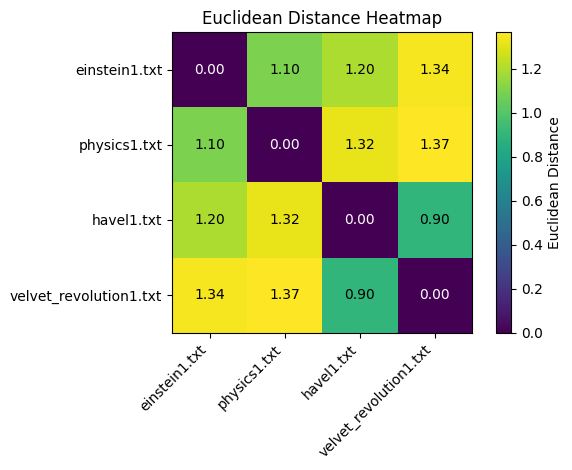

In [16]:
#experiment to see map distances
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 1) Rebuild your target vectors if needed
entity_to_vec = dict(zip(file_names, all_embeddings))
targets = ["einstein1.txt","physics1.txt","havel1.txt","velvet_revolution1.txt"]
vecs = np.stack([entity_to_vec[name] for name in targets])

# 2) Compute distances
dist_matrix = euclidean_distances(vecs)

# 3) Plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(dist_matrix)

min_val, max_val = dist_matrix.min(), dist_matrix.max()
mid_val = (min_val + max_val) / 2

# Annotate each cell:
for i in range(len(targets)):
    for j in range(len(targets)):
        val = dist_matrix[i, j]
        color = 'black' if val > mid_val else 'white'
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color=color)

ax.set_xticks(range(len(targets)))
ax.set_xticklabels(targets, rotation=45, ha='right')
ax.set_yticks(range(len(targets)))
ax.set_yticklabels(targets)
ax.set_title("Euclidean Distance Heatmap")
fig.colorbar(im, ax=ax, label="Euclidean Distance")
plt.tight_layout()
plt.show()
